In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pickle
import pathlib
import os
import copy
import datetime
import time
import sklearn

import seaborn as sns
sns.set_style()

In [2]:
data = pd.read_csv('Data/Preprocessed_Data_with_Label.csv', encoding='latin1')
print(data.shape)

(4701, 1660)


In [6]:
data

,ID,ANSWER1_101,ANSWER2_101,ANSWER3_101,ANSWER4_101,ANSWER5_101,ANSWER6_101,ANSWER7_101,ANSCOUNT_101,INDICATORID_101,...,ANSWER4_316,ANSWER5_316,ANSWER6_316,ANSWER7_316,ANSCOUNT_316,INDICATORID_316,SUBINDICATORID_316,LEVEL1ID,SURVEYR,DEMCODE
0,200,35,45,6,11,3,0,0,73497,4,...,7,7,2,8,73469,6,22,0,2020,2011
1,1200,41,45,5,8,2,0,0,11550,4,...,3,2,4,9,11552,6,22,1,2020,2011
2,2200,45,42,4,7,2,0,0,5626,4,...,8,7,2,9,5630,6,22,2,2020,2011
3,3200,29,48,6,12,4,0,0,7308,4,...,8,8,2,8,7308,6,22,3,2020,2011
4,4200,20,46,10,15,7,0,0,3252,4,...,13,20,2,5,3240,6,22,4,2020,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4696,91058,0,0,0,0,0,0,0,0,0,...,5,5,0,10,56,6,22,91,2018,2069
4697,92058,0,0,0,0,0,0,0,0,0,...,0,13,0,14,35,6,22,92,2018,2069
4698,93058,0,0,0,0,0,0,0,0,0,...,0,6,0,6,33,6,22,93,2018,2069
4699,94058,0,0,0,0,0,0,0,0,0,...,0,7,13,31,39,6,22,94,2018,2069


In [118]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
mapping1 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(data.drop(columns='ID', axis=1))
 
    distortions.append(sum(np.min(cdist(data.drop(columns='ID', axis=1), kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / data.shape[0])
 
    mapping1[k] = sum(np.min(cdist(data.drop(columns='ID', axis=1), kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / data.shape[0]

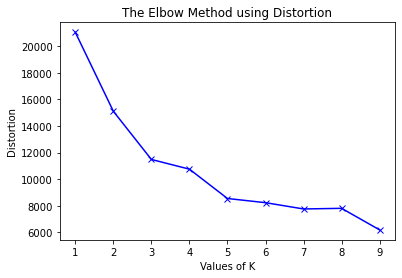

In [119]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [120]:
kmeanModel_3 = KMeans(n_clusters=3).fit(data.drop(columns='ID', axis=1))

In [121]:
cols = data.columns
data_centers = pd.DataFrame(kmeanModel_3.cluster_centers_, columns = cols[1:])

In [122]:
data_centers[['ANSWER1_163', 'ANSWER2_163', 'ANSWER3_163']]

,ANSWER1_163,ANSWER2_163,ANSWER3_163
0,29.186041,34.361711,36.459810
1,25.571429,40.000000,34.428571
2,25.694915,37.423729,36.898305


C:\Users\kjodo\AppData\Local\Temp/ipykernel_11476/1340147860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_data['pred'] = kmeanModel_3.predict(data.drop(columns='ID', axis=1))


<AxesSubplot:xlabel='ANSWER1_163', ylabel='ANSWER2_163'>

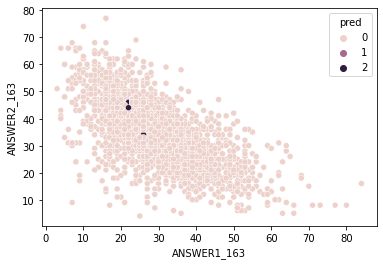

In [127]:
tmp_data = data[['ANSWER1_163', 'ANSWER2_163']]
tmp_data['pred'] = kmeanModel_3.predict(data.drop(columns='ID', axis=1))
sns.scatterplot(x='ANSWER1_163', y='ANSWER2_163', hue='pred', data=tmp_data)

In [132]:
tmp_data.pred.describe()

count    4701.000000
mean        0.028079
std         0.228917
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: pred, dtype: float64

Les k-centres pour les catégories de personnes n'expliquent pas la variance de la mobilité

In [92]:
data_transpose = data.transpose()

distortions = []
mapping1 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the data
    kmeanModel = KMeans(n_clusters=k).fit(data_transpose)
 
    distortions.append(sum(np.min(cdist(data_transpose, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / data_transpose.shape[0])
 
    mapping1[k] = sum(np.min(cdist(data_transpose, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / data_transpose.shape[0]

C:\Users\kjodo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


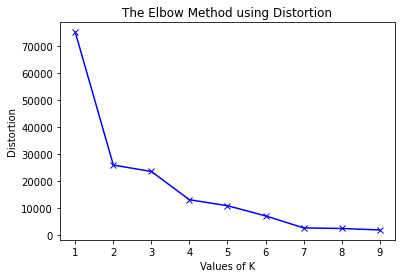

In [57]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [58]:
kmeanModel_2 = KMeans(n_clusters=2).fit(data_transpose)

In [59]:
kmeanModel_2.cluster_centers_

array([[1.71690528e+03, 2.95720915e+02, 1.69971392e+02, ...,
        9.27730451e+01, 9.34856961e+01, 9.61137953e+01],
       [7.32623678e+04, 1.15152874e+04, 5.60959770e+03, ...,
        2.79425287e+01, 3.60689655e+01, 1.15275862e+02]])

In [60]:
cols = data['LEVEL1ID'].apply(str) + ' ' + data['SURVEYR'].apply(str)  + ' ' + data['DEMCODE'].apply(str)
data_centers = pd.DataFrame(kmeanModel_2.cluster_centers_, columns = cols)

In [61]:
data_centers

,0 2020 2011,1 2020 2011,2 2020 2011,3 2020 2011,4 2020 2011,5 2020 2011,6 2020 2011,7 2020 2011,8 2020 2011,9 2020 2011,...,82 2018 2069,83 2018 2069,86 2018 2069,88 2018 2069,89 2018 2069,91 2018 2069,92 2018 2069,93 2018 2069,94 2018 2069,95 2018 2069
0,1716.905277,295.720915,169.971392,209.797839,136.339479,113.968214,81.616020,134.865226,78.161475,77.205976,...,87.191990,104.107438,99.953592,99.717737,94.384615,91.579784,92.043229,92.773045,93.485696,96.113795
1,73262.367816,11515.287356,5609.597701,7284.068966,3236.816092,3003.333333,1606.758621,3964.195402,1666.045977,1343.068966,...,50.793103,953.540230,789.137931,612.965517,170.011494,47.459770,29.655172,27.942529,36.068966,115.275862


C:\Users\kjodo\AppData\Local\Temp/ipykernel_11476/2004166586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_data['pred'] = kmeanModel_2.predict(data_transpose)


<AxesSubplot:xlabel='0', ylabel='1'>

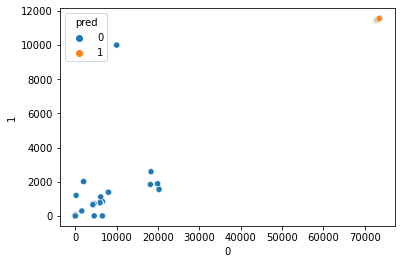

In [89]:
tmp_data = data_transpose[[0, 1]]
tmp_data['pred'] = kmeanModel_2.predict(data_transpose)
sns.scatterplot(x=0, y=1, hue='pred', data=tmp_data)

In [46]:
data.head()

,ID,ANSWER1_101,ANSWER2_101,ANSWER3_101,ANSWER4_101,ANSWER5_101,ANSWER6_101,ANSWER7_101,ANSCOUNT_101,INDICATORID_101,...,ANSWER4_316,ANSWER5_316,ANSWER6_316,ANSWER7_316,ANSCOUNT_316,INDICATORID_316,SUBINDICATORID_316,LEVEL1ID,SURVEYR,DEMCODE
0,200,35,45,6,11,3,0,0,73497,4,...,7,7,2,8,73469,6,22,0,2020,2011
1,1200,41,45,5,8,2,0,0,11550,4,...,3,2,4,9,11552,6,22,1,2020,2011
2,2200,45,42,4,7,2,0,0,5626,4,...,8,7,2,9,5630,6,22,2,2020,2011
3,3200,29,48,6,12,4,0,0,7308,4,...,8,8,2,8,7308,6,22,3,2020,2011
4,4200,20,46,10,15,7,0,0,3252,4,...,13,20,2,5,3240,6,22,4,2020,2011


In [67]:
data_transpose['ANSWER1_101', 'ANSWER2_101']

KeyError: ('ANSWER1_101', 'ANSWER2_101')

In [65]:
tmp_data

,ANSWER1_101,ANSWER2_101
0,35,45
1,41,45
2,45,42
3,29,48
4,20,46
...,...,...
4696,0,0
4697,0,0
4698,0,0
4699,0,0


In [78]:
pd.DataFrame({'test':kmeanModel_2.predict(data_transpose)})

,test
0,0
1,0
2,0
3,0
4,0
...,...
1655,0
1656,0
1657,0
1658,0


In [82]:
data_transpose[[0]]



,0
ID,200
ANSWER1_101,35
ANSWER2_101,45
ANSWER3_101,6
ANSWER4_101,11
...,...
INDICATORID_316,6
SUBINDICATORID_316,22
LEVEL1ID,0
SURVEYR,2020
